<a href="https://colab.research.google.com/github/carlavilla/GIS/blob/main/CV_PS1_GIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supernatural beliefs across the United States
Mapping out sightings/ and reported beliefs in the supernatural to determine the spookiest state. </br>

##Hypothesis:
At least one state will be among the top in spooky sightings or beliefs.

#Comments from class 9/25:
*   Drones in NJ 2025
*   Clown sightings 2016?
*   Population density
*   Sales of UFO merchandise
*   Mental Health
*   Openness to experience scale
*   Belief in UFO
*   Folklore, creatures, legends
*   Cults
*   Native American territories
*   Spirituality
*   Years of catastrophies and prophecies (2000, 2012, 2020)



#Environment Set up

In [ ]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 6.9 MB/s eta 0:00:00


In [ ]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd

import mapclassify

import seaborn as sns


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files

from google.colab.data_table import DataTable
DataTable.max_columns = 250

#Dataset 1: UFO Sightings in the US
UFO sightings reported to the National UFO Reporting Center for the year 2025 up to date. </br>

Source: [NUFORC Databank](https://nuforc.org/databank/) </br>
Data was sorted for USA sightings on the website and recorded onto an excel spreadsheet for this project. Other interesting variables include date of sighting, city of report, shape of object, and alternative explanation for event. Although some events appear to be disproven, all sightings are used as indicative of supernatural beliefs. </br>

##UFO Sightings dataset comments:
Since dataset includes single entries of sightings, the count for the number of sightings in each state was calculated. This count appears in python as a series, but this series will be used as the variable to merge with the map.
Note that three non-state places are in the count as well: England, Uşak, and
ON. These will be removed during merging. </br>

**Top 10 states** with reported sightings in 2025: California (248), Florida (174), Texas (116), Washington (103), Arizona (102), New York, Pennsylvania, Colorado, Ohio, and Oregon.

In [ ]:
! wget -q -O ufo.xlsx https://docs.google.com/uc?id=1cBtfSIE8KN7mGsBbWn2bTBP0yOuVyJlV&export=download

In [ ]:
ufo=pd.read_excel('ufo.xlsx')

In [ ]:
ufo.head(5)

,Occurred,City,State,Country,Shape,Summary,Reported,Media,Explanation
0,2025-09-05 05:20:00,Everett,WA,USA,Cigar,Very large cigar ship went into the tree line,2025-09-05,NaN,NaN
1,2025-09-04 07:15:00,South Patrick Shores,FL,USA,Orb,"Fast moving object, appears and disappears qui...",2025-09-05,NaN,NaN
2,2025-09-05 11:23:00,Schenectady,NY,USA,Circle,Round shiny circle.,2025-09-05,Y,Balloon?
3,2025-09-01 22:26:00,Olympia,WA,USA,Light,Two giant teal & white light hoops scanned our...,2025-09-05,NaN,NaN
4,2025-09-05 22:15:00,Blacksburg,SC,USA,Cube,3 very shiny cubes,2025-09-05,NaN,NaN


In [ ]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Occurred      2190 non-null   datetime64[ns]
 1   City          2165 non-null   object        
 2   State         2189 non-null   object        
 3   Country       2190 non-null   object        
 4   Shape         2190 non-null   object        
 5   Summary       2189 non-null   object        
 6   Reported      2190 non-null   datetime64[ns]
 7   Media         887 non-null    object        
 8   Explanation   716 non-null    object        
dtypes: datetime64[ns](2), object(7)
memory usage: 154.1+ KB


In [ ]:
ufo.rename(columns={'State\xa0': 'state'}, inplace=True)
#I kept getting an error when I tried doing the count by state. When I used Gemini to check, it identified that the variable is named "State\xa0" even though it didnt show in the header or info.

In [ ]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Occurred      2190 non-null   datetime64[ns]
 1   City          2165 non-null   object        
 2   state         2189 non-null   object        
 3   Country       2190 non-null   object        
 4   Shape         2190 non-null   object        
 5   Summary       2189 non-null   object        
 6   Reported      2190 non-null   datetime64[ns]
 7   Media         887 non-null    object        
 8   Explanation   716 non-null    object        
dtypes: datetime64[ns](2), object(7)
memory usage: 154.1+ KB


In [ ]:
#getting the count by state
from collections import Counter
ufocount = ufo['state'].value_counts()
print(ufocount)
#Non-state rows will be removed during merging

state
CA         248
FL         174
TX         116
WA         103
AZ         102
NY          99
PA          83
CO          76
OH          73
OR          64
GA          62
IL          51
MI          51
WI          48
NC          46
SC          44
VA          41
TN          40
MA          39
NJ          36
AL          35
MO          35
KY          33
MN          33
NH          32
ID          31
NM          31
IN          30
MD          29
NV          28
UT          27
IA          27
CT          23
KS          23
AR          20
NE          18
OK          16
LA          14
MS          14
WV          14
VT          13
ME          12
RI          11
MT           8
WY           8
DE           6
HI           6
SD           5
AK           4
DC           2
ND           2
England      1
Uşak         1
ON           1
Name: count, dtype: int64


#Dataset 2: Haunted Places in the US
Haunted places in the US as recorded in the [Shadowlands Haunted Places Index](https://www.theshadowlands.net/places/), last updated in 2020.

Source: [Github Tidy Tuesday Database](https://github.com/rfordatascience/tidytuesday/blob/main/data/2023/2023-10-10/readme.md) </br>
Data was gathered by user [Tim Renner](https://github.com/timothyrenner/shadowlands-haunted-places) for a tidytuesday challenge. Other interesting variables include description of haunting/place, city, and latitutde/longitude of place.

##Haunted Places dataset comments:
Since dataset includes single entries of haunted places, the count for the number of places in each state was calculated. This count appears in python as a series, but this series will be used as the variable to merge with the map.

**Top 10 states** with haunted places: California (1070), Texas (696), Pennsylvania (649), Michigan (529), Ohio (477), New York, Illinois, Kentucky, Indiana, and Massachussetts.

In [ ]:
haunted=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-10-10/haunted_places.csv')

In [ ]:
haunted.head(5)

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097


In [ ]:
haunted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            10989 non-null  object 
 1   country         10992 non-null  object 
 2   description     10992 non-null  object 
 3   location        10989 non-null  object 
 4   state           10992 non-null  object 
 5   state_abbrev    10992 non-null  object 
 6   longitude       9731 non-null   float64
 7   latitude        9731 non-null   float64
 8   city_longitude  10963 non-null  float64
 9   city_latitude   10963 non-null  float64
dtypes: float64(4), object(6)
memory usage: 858.9+ KB


In [ ]:
haunted.rename(columns={'state': 'statefull'}, inplace=True)
haunted.rename(columns={'state_abbrev': 'state'}, inplace=True)
#changing variable names so they can be used for merging later

In [ ]:
haunted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            10989 non-null  object 
 1   country         10992 non-null  object 
 2   description     10992 non-null  object 
 3   location        10989 non-null  object 
 4   statefull       10992 non-null  object 
 5   state           10992 non-null  object 
 6   longitude       9731 non-null   float64
 7   latitude        9731 non-null   float64
 8   city_longitude  10963 non-null  float64
 9   city_latitude   10963 non-null  float64
dtypes: float64(4), object(6)
memory usage: 858.9+ KB


In [ ]:
hauntedcount = haunted['state'].value_counts()
print(hauntedcount)

state
CA    1070
TX     696
PA     649
MI     529
OH     477
NY     459
IL     395
KY     370
IN     351
MA     342
FL     328
MO     314
GA     289
WI     274
AL     224
TN     221
WA     218
NC     211
OK     211
NJ     194
VA     192
CT     185
MD     170
IA     169
SC     168
CO     166
MN     162
AZ     156
OR     155
UT     134
KS     123
AR     119
NE     111
WV     106
LA      99
HI      96
NM      78
WY      76
SD      75
NH      72
RI      68
ID      66
VT      63
MS      63
ND      58
ME      57
NV      56
MT      42
DE      37
AK      32
DC      16
Name: count, dtype: int64


#Map: US States

In [ ]:
! wget -q -O cb_2018_us_state_500k.zip https://drive.google.com/uc?id=1IXaF4nV8hNVcoscbNRwiYzJKl_jstyxA&export=download
zip_ref = zipfile.ZipFile('cb_2018_us_state_500k.zip', 'r'); zip_ref.extractall(); zip_ref.close()
UStates=gpd.read_file('cb_2018_us_state_500k.shp')

In [ ]:
UStates.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   56 non-null     object  
 1   STATENS   56 non-null     object  
 2   AFFGEOID  56 non-null     object  
 3   GEOID     56 non-null     object  
 4   STUSPS    56 non-null     object  
 5   NAME      56 non-null     object  
 6   LSAD      56 non-null     object  
 7   ALAND     56 non-null     int64   
 8   AWATER    56 non-null     int64   
 9   geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 4.5+ KB


In [ ]:
UStates.head(5) #looking for the variabla that shows the state name. Since this has an state abbreviation column, I'll use that for merging.

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


In [ ]:
UStates.rename(columns={'STUSPS': 'state'}, inplace= True)

In [ ]:
UStates.dtypes

,0
STATEFP,object
STATENS,object
AFFGEOID,object
GEOID,object
state,object
NAME,object
LSAD,object
ALAND,int64
AWATER,int64
geometry,geometry


<Axes: >

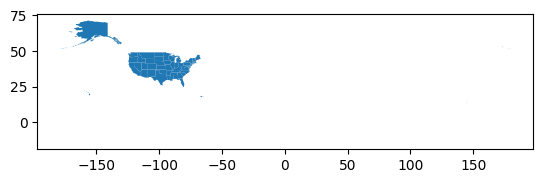

In [ ]:
UStates.plot()
plt.show()
#plot shows up really tiny!

<Axes: >

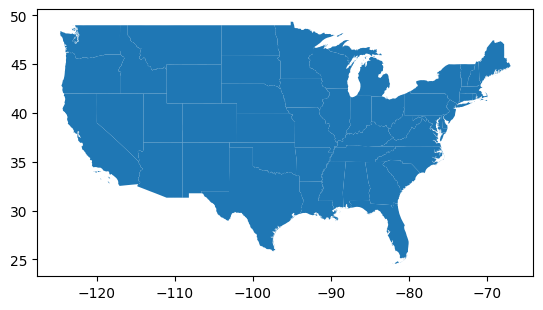

In [ ]:
#found this in the notes for a future lecture for this class
contUS = UStates[~UStates['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico','American Samoa','United States Virgin Islands','Guam','Commonwealth of the Northern Mariana Islands'])]
contUS.plot()
#I like it but want to include Alaska and Hawaii

<Axes: >

(-180.0, -60.0)

(15.0, 75.0)

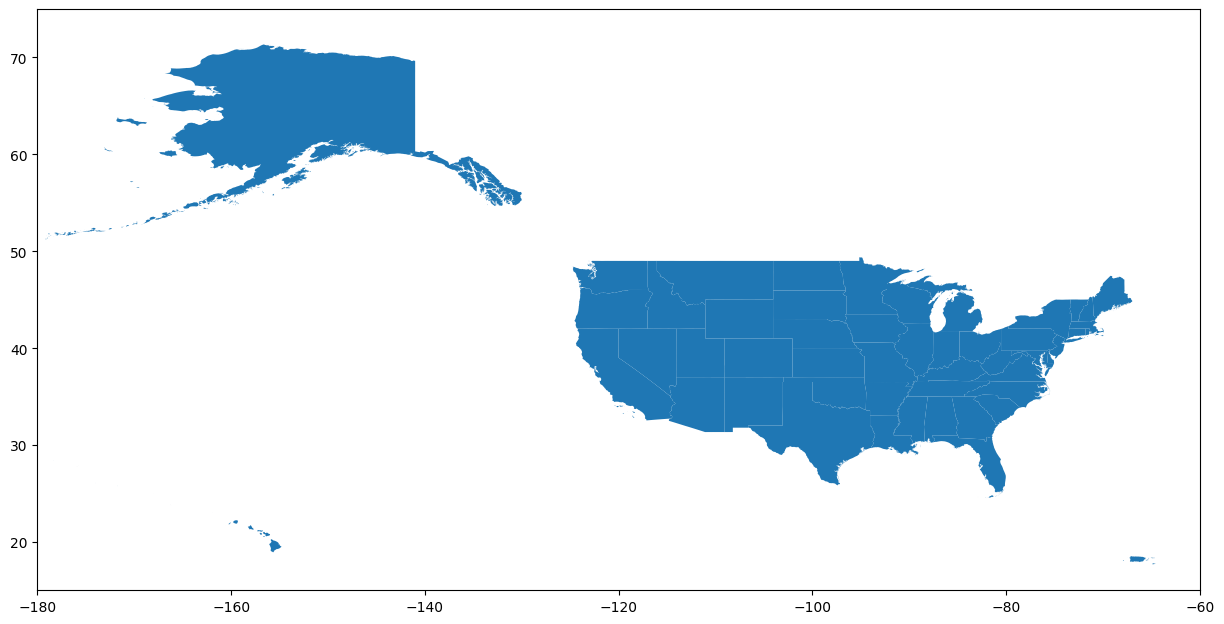

In [ ]:
#Used Gemini to get the code for figsize and limit and played with the specs until I got this
fig, ax = plt.subplots(1, 1, figsize=(15, 20))
UStates.plot(ax=ax)
plt.xlim([-180, -60])
plt.ylim([15, 75])
ax.set_aspect('equal')
plt.show()

#UFO Sightings in per State

##Comments on merging:
Note that Englang, Usak, and ON are the non-state cases from the ufo dataset. Ok to let these go during merging. </br>
The five map areas that contain no data for ufo sightings correspond to US territories. Ok with letting these go during merging.

In [ ]:
spooky1 = pd.merge(UStates, ufocount, on='state',how='outer',indicator=True) #outer merging
spooky1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   56 non-null     object  
 1   STATENS   56 non-null     object  
 2   AFFGEOID  56 non-null     object  
 3   GEOID     56 non-null     object  
 4   state     59 non-null     object  
 5   NAME      56 non-null     object  
 6   LSAD      56 non-null     object  
 7   ALAND     56 non-null     float64 
 8   AWATER    56 non-null     float64 
 9   geometry  56 non-null     geometry
 10  count     54 non-null     float64 
 11  _merge    59 non-null     category
dtypes: category(1), float64(3), geometry(1), object(7)
memory usage: 5.4+ KB


In [ ]:
spooky1[['state', 'count', '_merge']]

,state,count,_merge
0,AK,4.0,both
1,AL,35.0,both
2,AR,20.0,both
3,AS,NaN,left_only
4,AZ,102.0,both
5,CA,248.0,both
6,CO,76.0,both
7,CT,23.0,both
8,DC,2.0,both
9,DE,6.0,both


In [ ]:
spooky2 = pd.merge(UStates, ufocount, on='state',how='inner',indicator=False)

In [ ]:
spooky2.rename(columns={'count': 'ufo_sights'}, inplace=True) #changing name of "count" variable so it's easier to distinguish later

##Map of UFO Sightings
The top 10 states with the most sightings appear in the deepest green: California, Florida, Texas, Washington, Arizona, New York, Pennsylvania, Colorado, Ohio, and Oregon. Only California and Texas have reported over  sightings, while most of states have reported 50 sightings or fewer.



(-180.0, -60.0)

(10.0, 75.0)

<Axes: >

[]

[]

Text(0.5, 1009.3914778743468, 'source/definition: nuforc.org/databank/')

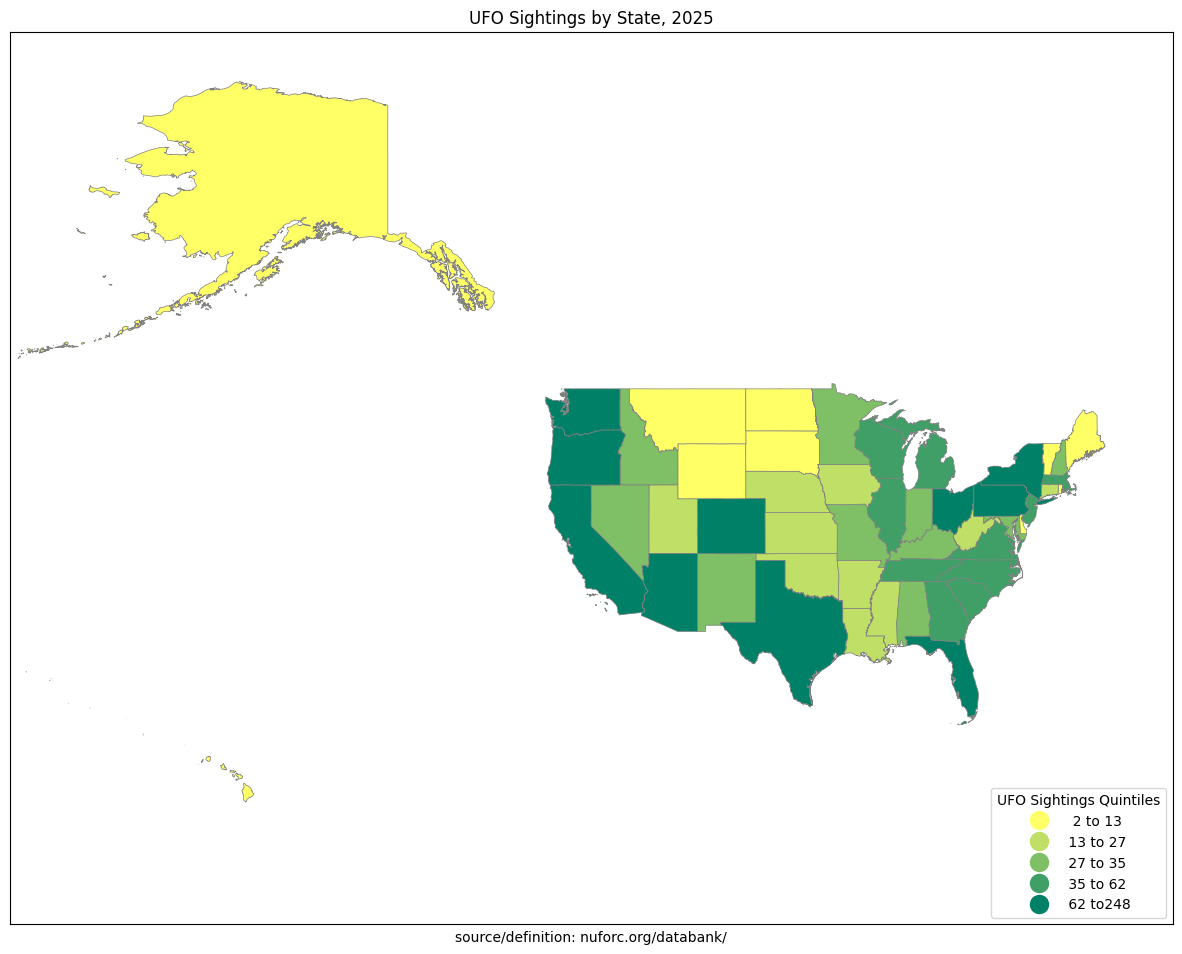

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 30))
plt.xlim([-180, -60])
plt.ylim([10, 75])
ax.set_aspect('equal')
spooky2.plot(ax=ax,column='ufo_sights',legend=True,cmap='summer_r',
          scheme='quantiles',k=5, edgecolor='grey',linewidth=.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''UFO Sightings Quintiles''')
ax.title.set_text("UFO Sightings by State, 2025")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('''source/definition: nuforc.org/databank/''')

for lbl in leg1.get_texts():
        label_text = lbl.get_text()
        new_text = label_text.replace(', ', ' to')
        lbl.set_text(new_text)

(-180.0, -60.0)

(10.0, 75.0)

<Axes: >

[]

[]

Text(0.5, 1009.3914778743468, 'source/definition: nuforc.org/databank/')

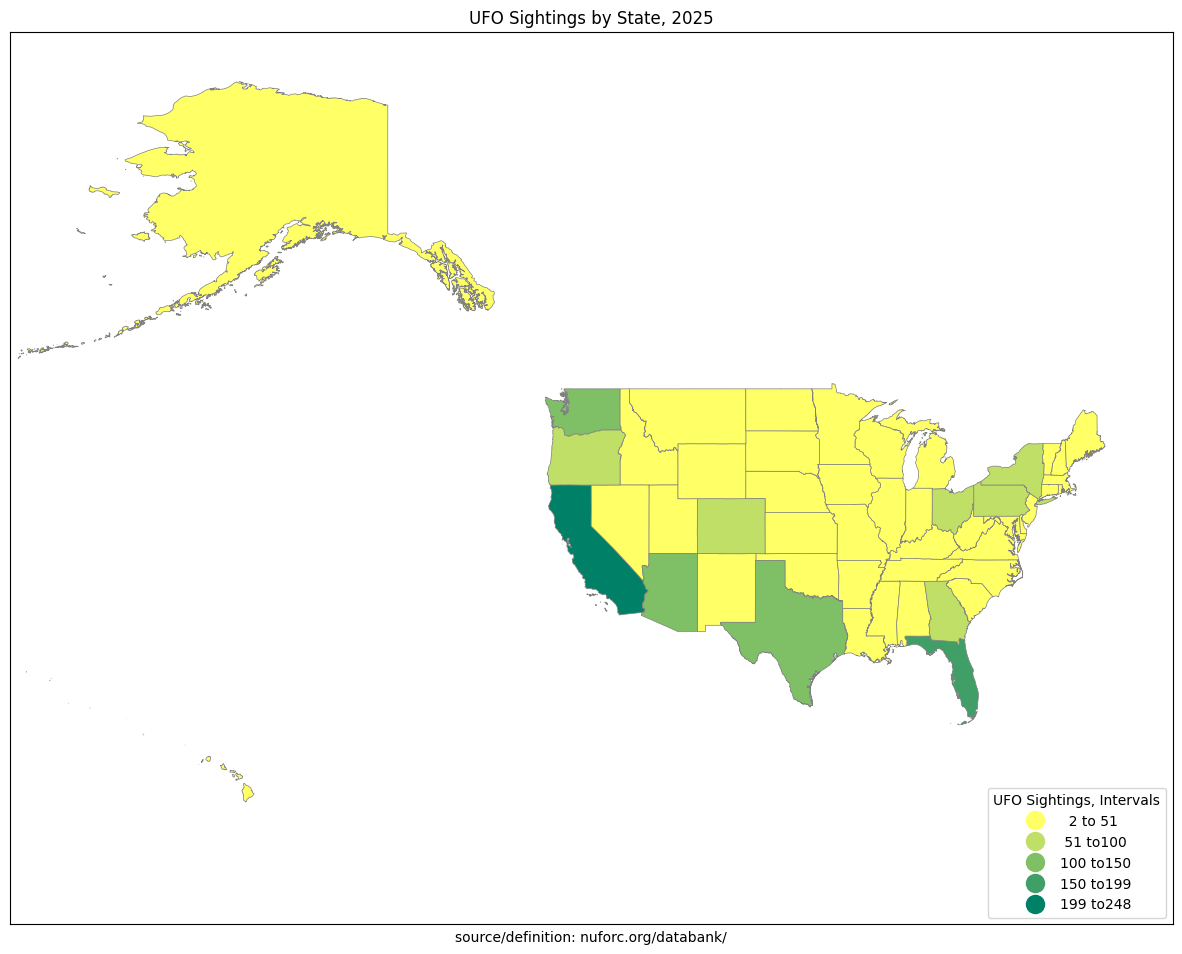

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 30))
plt.xlim([-180, -60])
plt.ylim([10, 75])
ax.set_aspect('equal')
spooky2.plot(ax=ax,column='ufo_sights',legend=True,cmap='summer_r',
          scheme='equalinterval',k=5, edgecolor='grey',linewidth=.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''UFO Sightings, Intervals''')
ax.title.set_text("UFO Sightings by State, 2025")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('''source/definition: nuforc.org/databank/''')

for lbl in leg1.get_texts():
        label_text = lbl.get_text()
        new_text = label_text.replace(', ', ' to')
        lbl.set_text(new_text)

#Haunted Places per State

##Comments on merging:
As with the previous merging for ufo sightings, the five map areas that contain no data for haunted places sightings correspond to US territories. Ok with letting these go during merging.

In [ ]:
spooky3= pd.merge(UStates, hauntedcount, on='state',how='outer',indicator=True)
spooky3[['state', 'count', '_merge']]

,state,count,_merge
0,AK,32.0,both
1,AL,224.0,both
2,AR,119.0,both
3,AS,NaN,left_only
4,AZ,156.0,both
5,CA,1070.0,both
6,CO,166.0,both
7,CT,185.0,both
8,DC,16.0,both
9,DE,37.0,both


In [ ]:
spooky4= pd.merge(UStates, hauntedcount, on='state',how='inner',indicator=False)

In [ ]:
spooky4.rename(columns={'count': 'haunted_places'}, inplace=True) #changing name of variable to distinguish more easily

##Map of Haunted Places by States
The top 10 states with the most hauntes places appear in black: California, Texas, Pennsylvania, Michigan, Ohio, New York, Illinois, Kentucky, Indiana, and Massachussetts. Only California, Texas, and Pennsylvania have 650 places or more. Most states have fewer than 250 haunted places.

(-180.0, -60.0)

(10.0, 75.0)

<Axes: >

[]

[]

Text(0.5, 1009.3914778743468, 'source/definition: tidytuesday/blob/main/data/2023/2023-10-10')

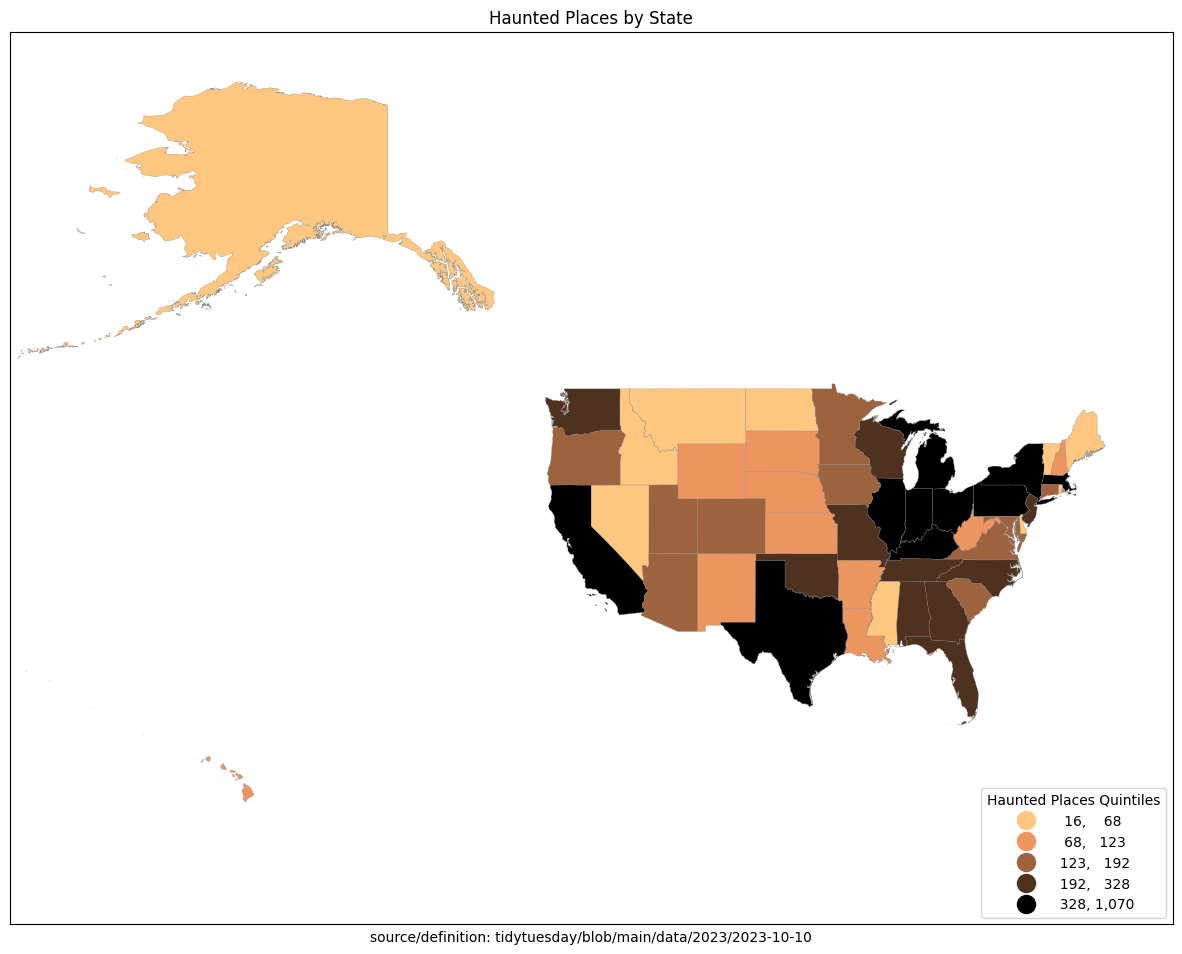

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 30))
plt.xlim([-180, -60])
plt.ylim([10, 75])
ax.set_aspect('equal')
spooky4.plot(ax=ax,column='haunted_places',legend=True,cmap='copper_r',
          scheme='quantiles',k=5, edgecolor='grey',linewidth=.2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''Haunted Places Quintiles''')
ax.title.set_text("Haunted Places by State")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: tidytuesday/blob/main/data/2023/2023-10-10''')

(-180.0, -60.0)

(10.0, 75.0)

<Axes: >

[]

[]

Text(0.5, 1009.3914778743468, 'source/definition: tidytuesday/blob/main/data/2023/2023-10-10')

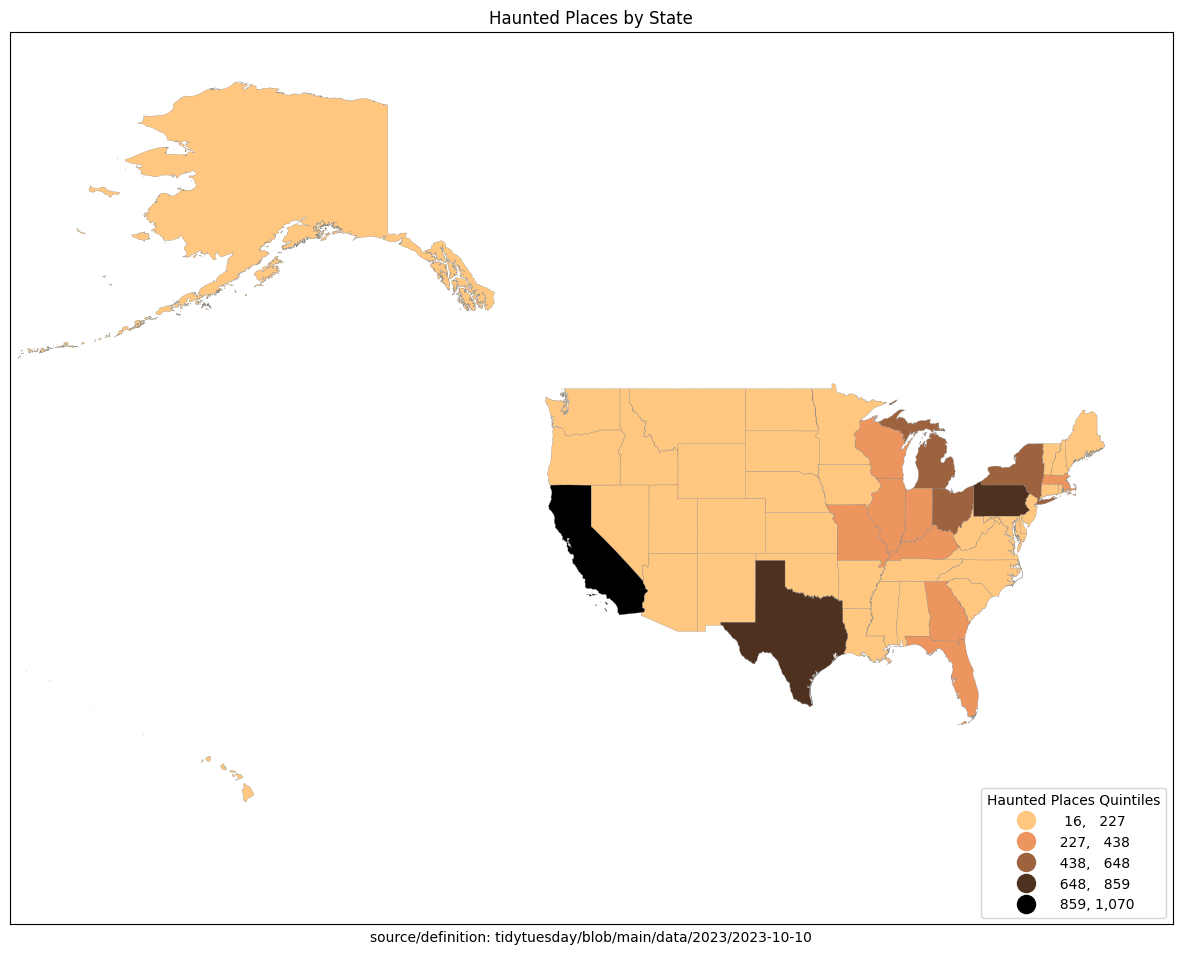

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 30))
plt.xlim([-180, -60])
plt.ylim([10, 75])
ax.set_aspect('equal')
spooky4.plot(ax=ax,column='haunted_places',legend=True,cmap='copper_r',
          scheme='equalinterval',k=5, edgecolor='grey',linewidth=.2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''Haunted Places Quintiles''')
ax.title.set_text("Haunted Places by State")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: tidytuesday/blob/main/data/2023/2023-10-10''')